### Program to construct a single neuron. Very basic, worthless in real life applications but worth a try

##### Import modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
## Create Dummy x and Y
x = 2*np.random.rand(100,1)
y = 4+8*x + np.random.randn(100,1)

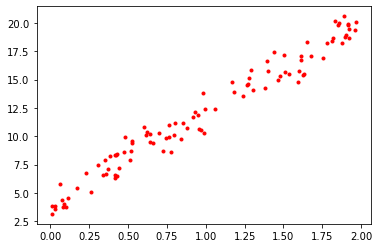

In [40]:
### Sample plot between X and Y
plt.plot(x,y,'r.')
#plt.twinx()
#plt.plot(y,'g')

#### Some Basic Dfinitions

In [94]:
np.random.seed(20)

#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
## Weight and bias initiation ##
weight = np.random.randn(1,1)
bias   = np.random.randn()
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
## Learning Rate and epoch number definition.
learning_rate = 0.01
epochs        = 2000
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
## Few Non linear function and its derivatives
def sigmoid(zz):
     return 1/(1+np.exp(-1*zz))

def derv_sigmoid(zz):
    return sigmoid(zz)*(1-sigmoid(zz))

def tanh(zz):
        return np.tanh(zz)

def derv_tanh(zz):
    return 1.0 - np.tanh(x) ** 2

def relu(zz):
     return np.where(x>0,x,0)

def derv_relu(zz):
     return np.where(x>0,1,0)

## Construct a single Neuron

In [102]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Train A single neuron without any activation function. Very messy code without any class.
for epoch in range(epochs):
    predictions = x.dot(weight) + bias
    predictions = predictions*1 ### Use 1 as activation function
    errors      = predictions-y

    ## Gradient descent
    weight -= learning_rate*(1/len(x))*x.T.dot(errors)
    bias   -= learning_rate*(1/len(x))*errors.sum()
    print('The Prediction error is, ',errors.sum())

The Prediction error is,  11.66159955347165
The Prediction error is,  11.693124309362975
The Prediction error is,  11.724570963708963
The Prediction error is,  11.75593968765211
The Prediction error is,  11.787230651963245
The Prediction error is,  11.818444027042318
The Prediction error is,  11.849579982919245
The Prediction error is,  11.880638689254646
The Prediction error is,  11.911620315340528
The Prediction error is,  11.9425250301015
The Prediction error is,  11.973353002095074
The Prediction error is,  12.004104399512759
The Prediction error is,  12.034779390180908
The Prediction error is,  12.065378141561219
The Prediction error is,  12.095900820751748
The Prediction error is,  12.126347594487651
The Prediction error is,  12.156718629142027
The Prediction error is,  12.18701409072651
The Prediction error is,  12.217234144892291
The Prediction error is,  12.247378956930817
The Prediction error is,  12.277448691774325
The Prediction error is,  12.307443513997256
The Prediction 

#### Few Experiements on it

##### First Experiement - learning_rate

In [112]:
## Use different Learning rate
np.random.seed(20)

error_curve = {}
for learning_rate in [0.5,0.01,0.001,0.9]:
    #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
    ## Weight and bias initiation ##
    weight = np.random.randn(1,1)
    bias   = np.random.randn()
    #$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
    err = []
    for epoch in range(epochs):
        predictions = x.dot(weight) + bias
        predictions = predictions*1 ### Use 1 as activation function
        errors      = predictions-y

        ## Gradient descent
        weight -= learning_rate*(1/len(x))*x.T.dot(errors)
        bias   -= learning_rate*(1/len(x))*errors.sum()

        total_err = errors.sum()
        # print('The Prediction error is, ',total_err)
        err.append(total_err)
    error_curve.update({learning_rate:err})


Text(0, 0.5, 'Absolute Error ($y_{act}-y_{pred}$)')

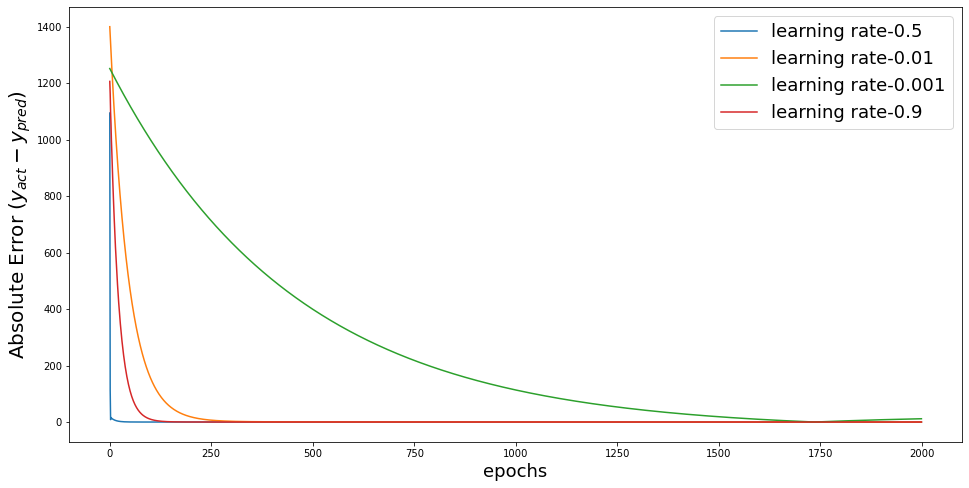

In [113]:
plt.figure(figsize=[16,8])

for i in list(error_curve.keys()):
    plt.plot(np.abs(error_curve[i]),label = f'learning rate-{i}')
    plt.legend(fontsize=18)
plt.xlabel('epochs',fontsize=18)
plt.ylabel('Absolute Error ($y_{act}-y_{pred}$)',fontsize=20)

The Above figure says that to small learning rate takes to much time to train, such as for case 0.001, while big learning rate also seems o increase training time. Also, too big learning rate (like 0.9) has another complex problem, it can overshoot the global minima. that problem is not clearly visible here. But it happens and will discuss in future problem. Hence, a suitable learning rate would be in between, i.e., here 0.5

########################################################### END ############################################################